In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib nbagg

In [24]:
file_name="Co60_120s.h5"
data=h5py.File(file_name,"r")
event_data=data["event_data"]
raw_data=np.array(data["raw_data"])
raw_data=np.float32(raw_data)


# plt.figure(0)
# leg=[]
# for i in range(73,74):
#     plt.plot(raw_data[i])
#     leg.append(str(i))
# plt.legend(leg)
# num_samples=np.shape(raw_data)[0]
# print(num_samples)


<IPython.core.display.Javascript object>


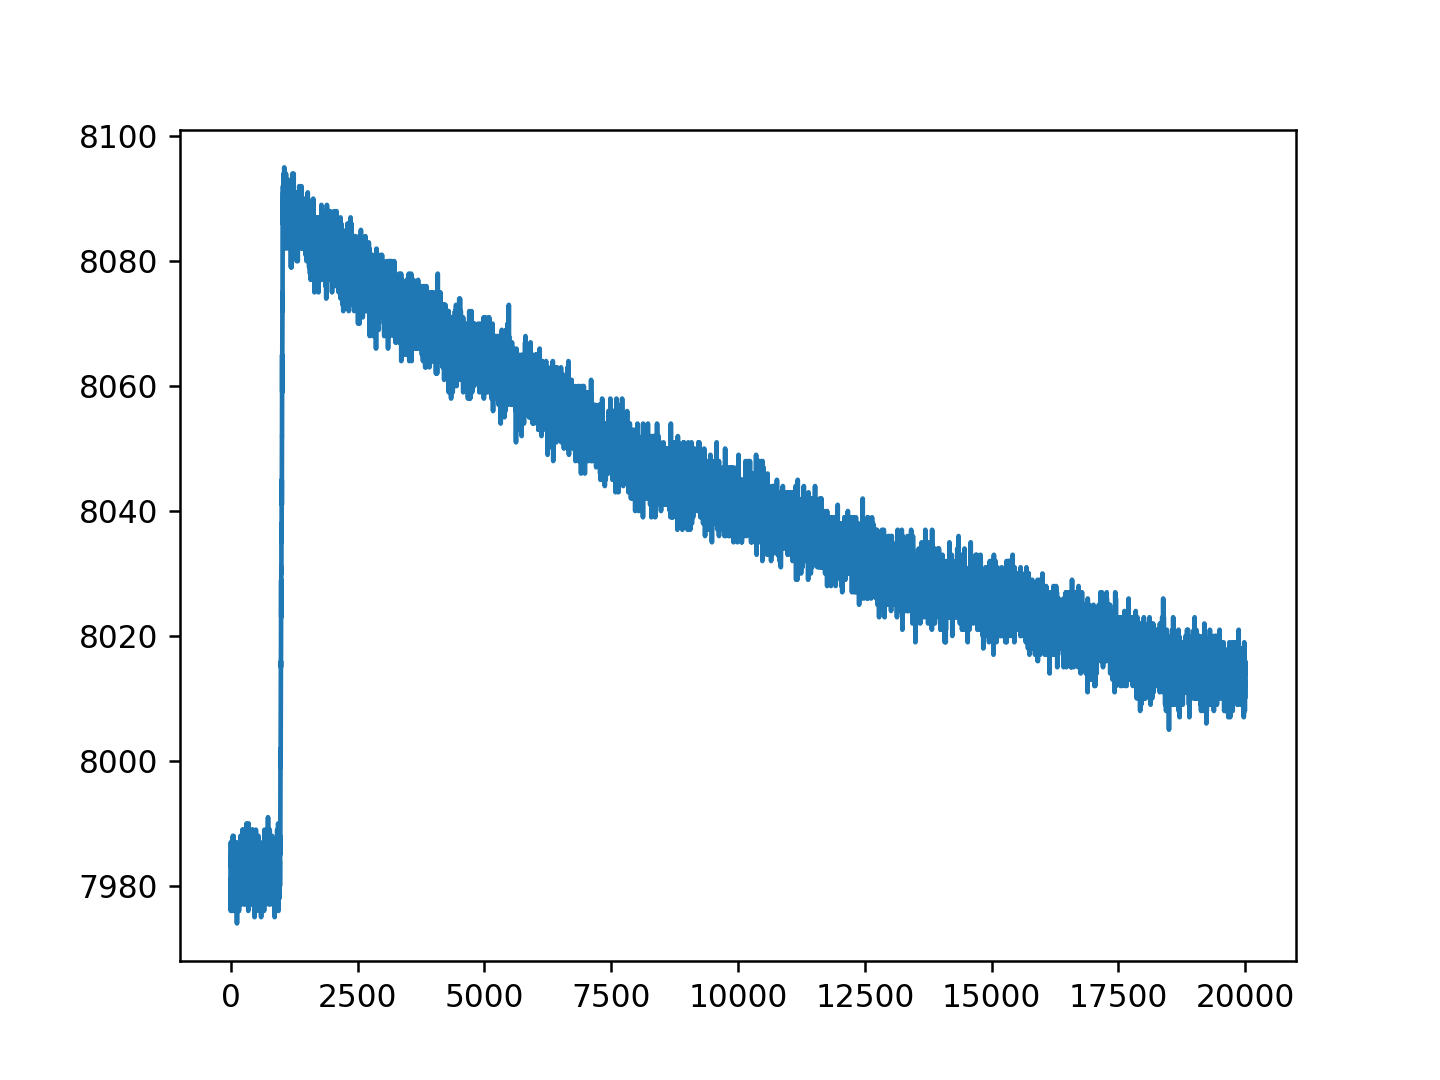

(18821, 20000)


In [3]:
plt.figure("test")
plt.plot(raw_data[0])
print(np.shape(raw_data))

In [25]:
waveform_maxima_indices=np.argmax(raw_data,axis=1)

<IPython.core.display.Javascript object>


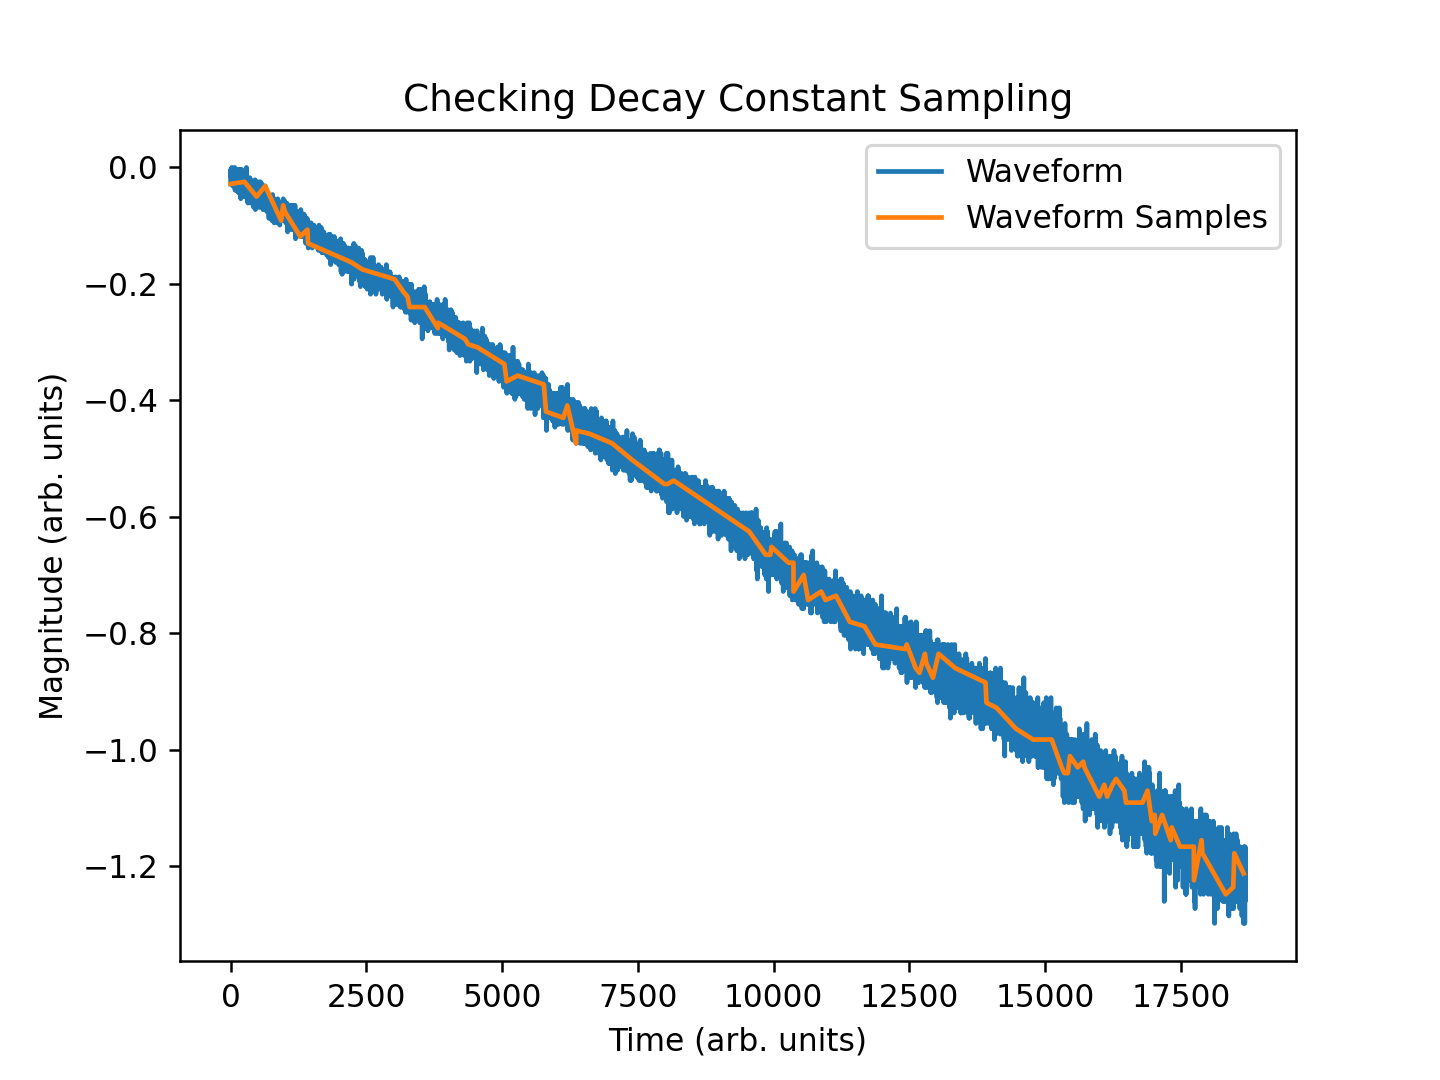

In [28]:
dc=np.zeros(np.shape(raw_data)[0])
failures=0
for i in range(0,np.shape(raw_data)[0]):

    try:
        baseline=np.mean(raw_data[i][0:900])
        waveform=raw_data[i][waveform_maxima_indices[i]:]
        normalized_waveform=np.log((waveform-baseline)/np.max(waveform-baseline))
        waveform_indices=np.arange(0,np.size(normalized_waveform))
        sample_indices=np.random.choice(waveform_indices,100)
        sample_indices=np.sort(sample_indices)
        sample_values=normalized_waveform[sample_indices]
    
        plt.figure("Test dc")
        plt.plot(waveform_indices,normalized_waveform)
        plt.plot(sample_indices,sample_values)
        plt.xlabel('Time (arb. units)')
        plt.ylabel("Magnitude (arb. units)")
        plt.title("Checking Decay Constant Sampling")
        plt.legend(["Waveform","Waveform Samples"])
        coeff=np.polyfit(sample_indices,sample_values,1)
        dc[i]=-1/coeff[0]
    except:
        failures=failures+1
        dc[i]=np.nan
    break
# to_delete=np.isnan(dc)
# raw_data=np.delete(raw_data,to_delete,axis=0)
# dc=np.delete(dc,to_delete)
    
# to_delete=np.isinf(dc)
# raw_data=np.delete(raw_data,to_delete,axis=0)
# dc=np.delete(dc,to_delete)
    
# to_delete=np.where(dc>np.mean(dc)+1*np.std(dc))
# raw_data=np.delete(raw_data,to_delete,axis=0)
# dc=np.delete(dc,to_delete)
    
# to_delete=np.where(dc<np.mean(dc)-1*np.std(dc))
# raw_data=np.delete(raw_data,to_delete,axis=0)
# dc=np.delete(dc,to_delete)
    
# to_delete=np.where(dc>np.mean(dc)+1*np.std(dc))
# raw_data=np.delete(raw_data,to_delete,axis=0)
# dc=np.delete(dc,to_delete)
    
# to_delete=np.where(dc<np.mean(dc)-1*np.std(dc))
# raw_data=np.delete(raw_data,to_delete,axis=0)
# dc=np.delete(dc,to_delete)

<IPython.core.display.Javascript object>


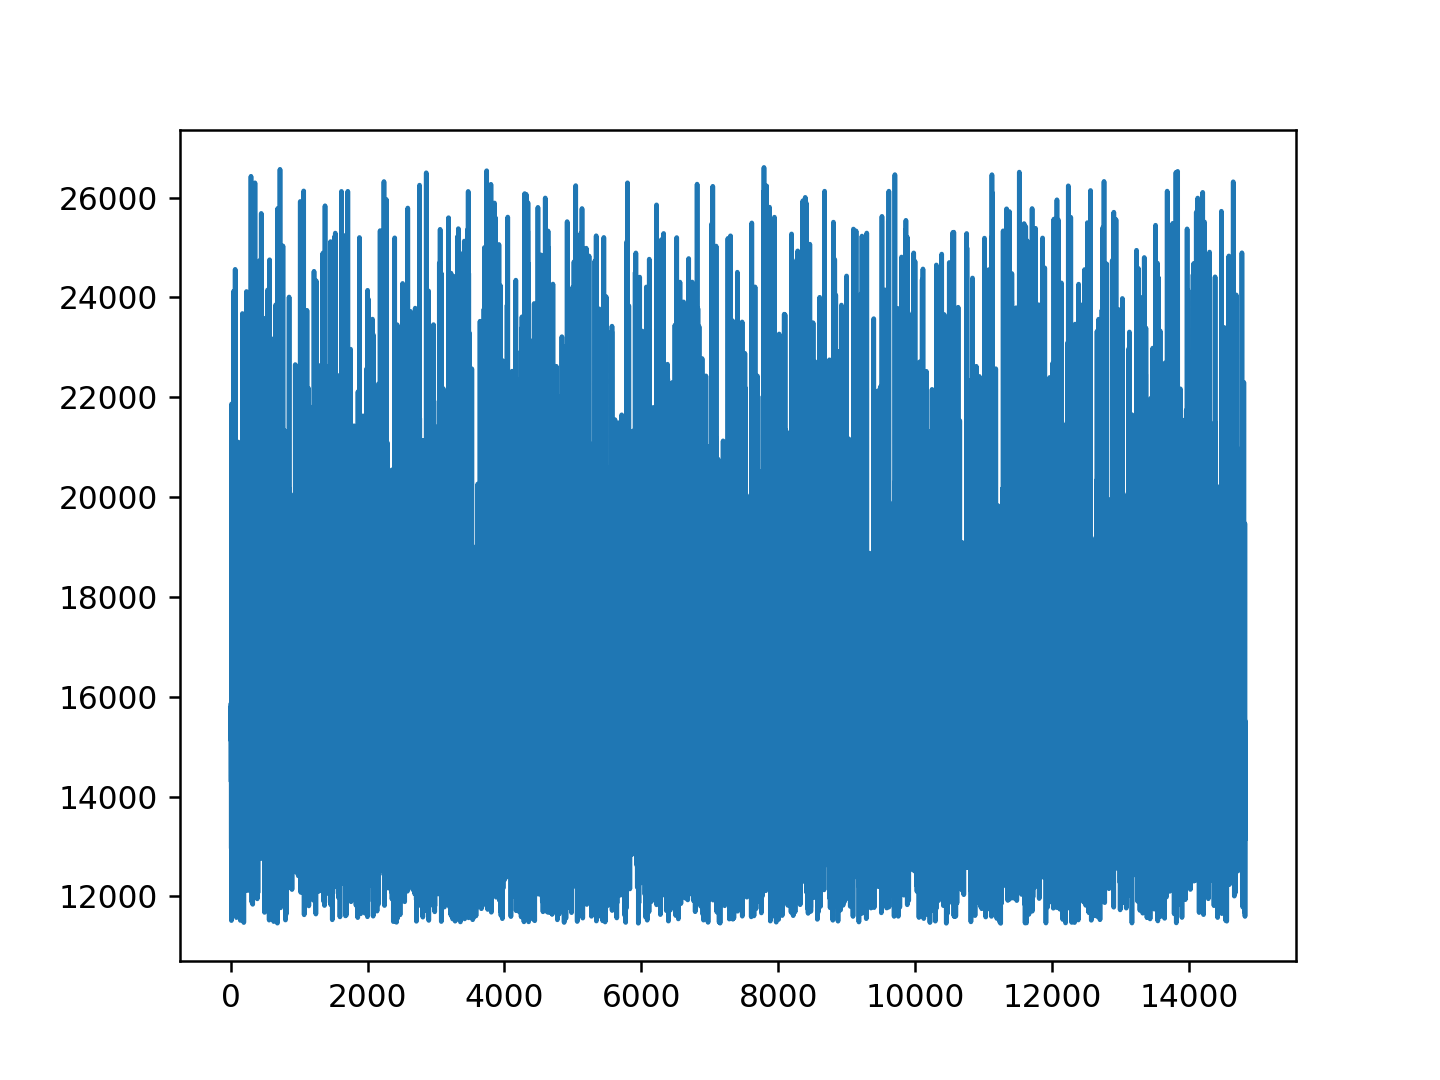

[15227.49561993 15127.58447626 15798.92521214 ... 14148.70660927
 15515.89633619 13159.38009904]
1686


In [6]:
plt.figure("Test")
plt.plot(dc)
print(dc)
print(failures)

In [7]:
raw_data=raw_data[:,0:2000]

<IPython.core.display.Javascript object>


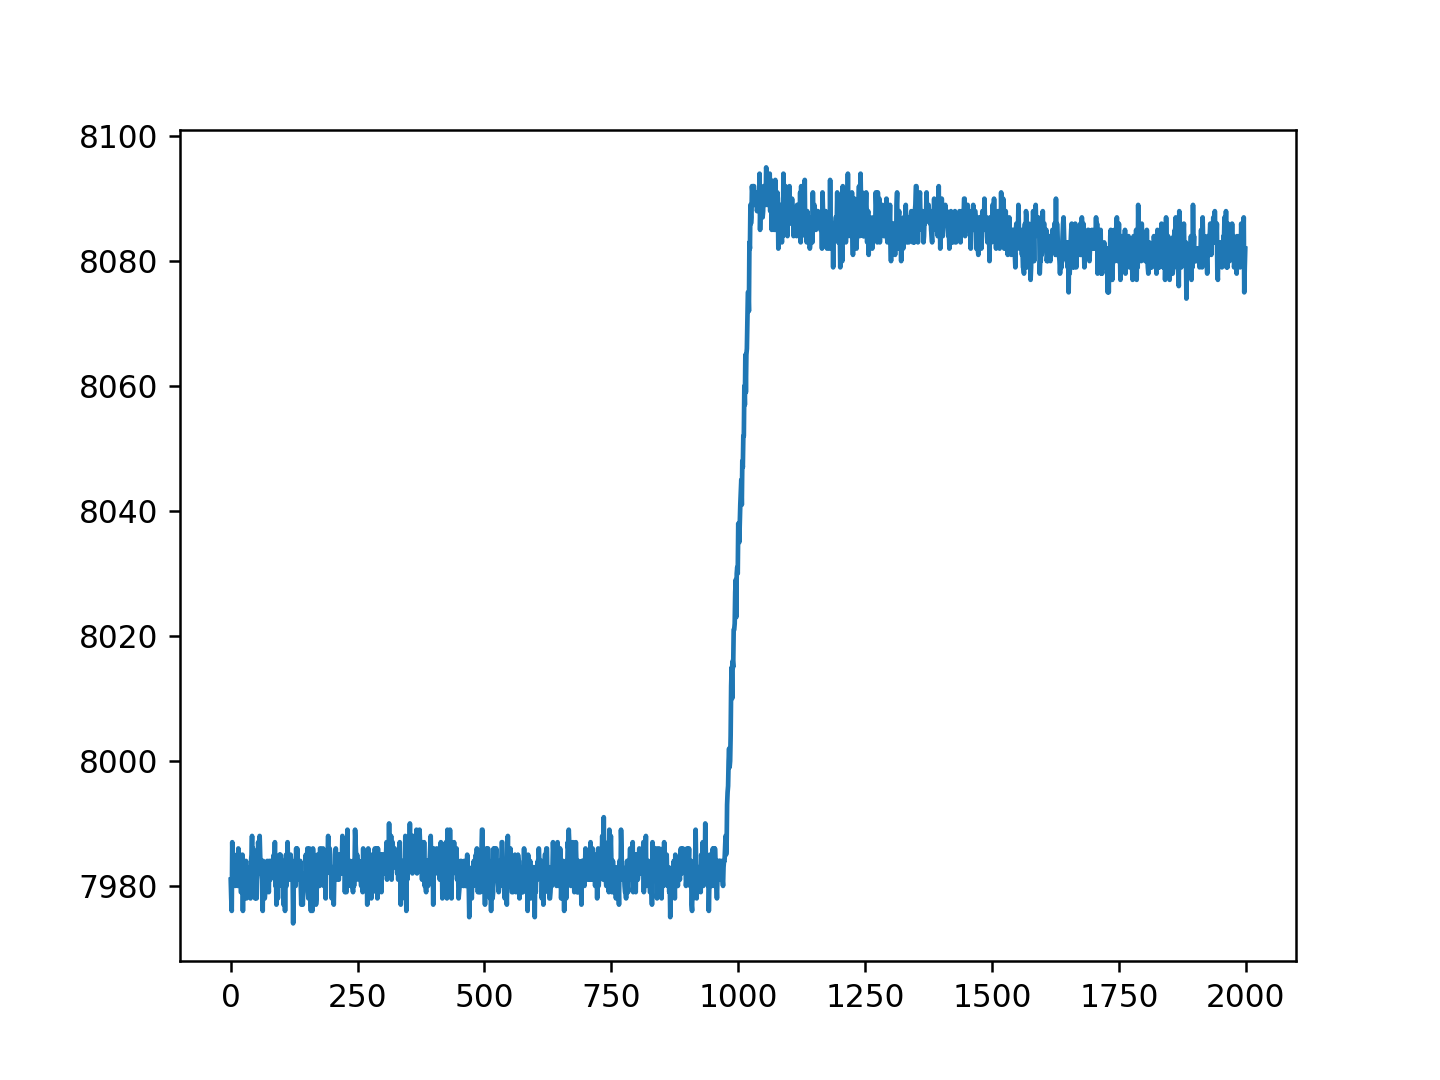

In [8]:
plt.figure("Test Waveforms")
plt.plot(raw_data[0])

In [21]:
#subtract baseline

# dc,cut_data=get_dc_array(raw_data) #decay constant, throws away badly shaped waveforms
l=200 #flat top plus rise time, flat top: gap time
k=205 #rise time - peaking time

# dc=7000
cut_data=raw_data

filtered_data=np.zeros(np.shape(cut_data))

for i in range(0,np.shape(cut_data)[0]):
    #baseline subtraction
    waveform=cut_data[i]
    baseline=np.mean(waveform[0:900])
    waveform=waveform-baseline
    #trapezoidal filter & pole-zero
    for j in range(0,np.size(waveform)):
        if j>k+l-1:
            d=waveform[j]-waveform[j-k]-waveform[j-l]+waveform[j-k-l]
            filtered_data[i][j]=filtered_data[i][j-1]*(1+1/dc[i])+d
    
# plt.figure("Trapz Filtered")
# for i in range(0,50):

#     plt.plot(filtered_data[i])


<IPython.core.display.Javascript object>


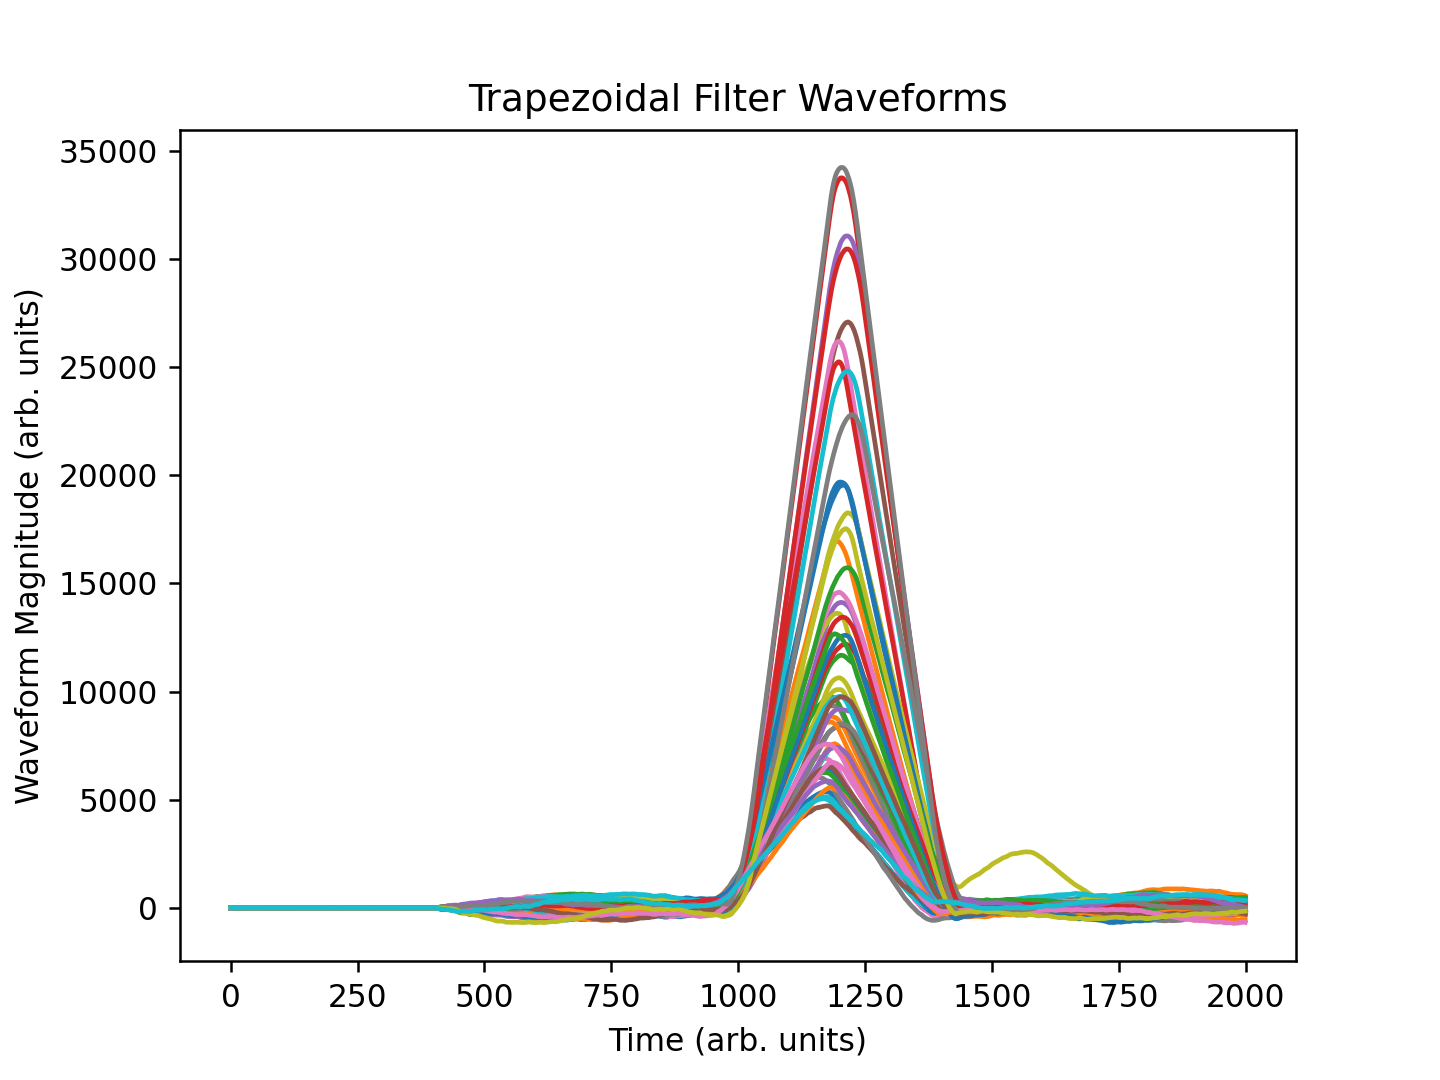

Text(0, 0.5, 'Waveform Magnitude (arb. units)')

In [22]:
plt.figure("Filtered Waveforms")
for i in range(0,50):
    plt.plot(filtered_data[i])
plt.title("Trapezoidal Filter Waveforms")
plt.xlabel("Time (arb. units)")
plt.ylabel("Waveform Magnitude (arb. units)")

In [10]:
corrected_spectrum=np.max(filtered_data,axis=1)
corrected_spectrum=np.delete(corrected_spectrum,np.where(corrected_spectrum<0))

<IPython.core.display.Javascript object>


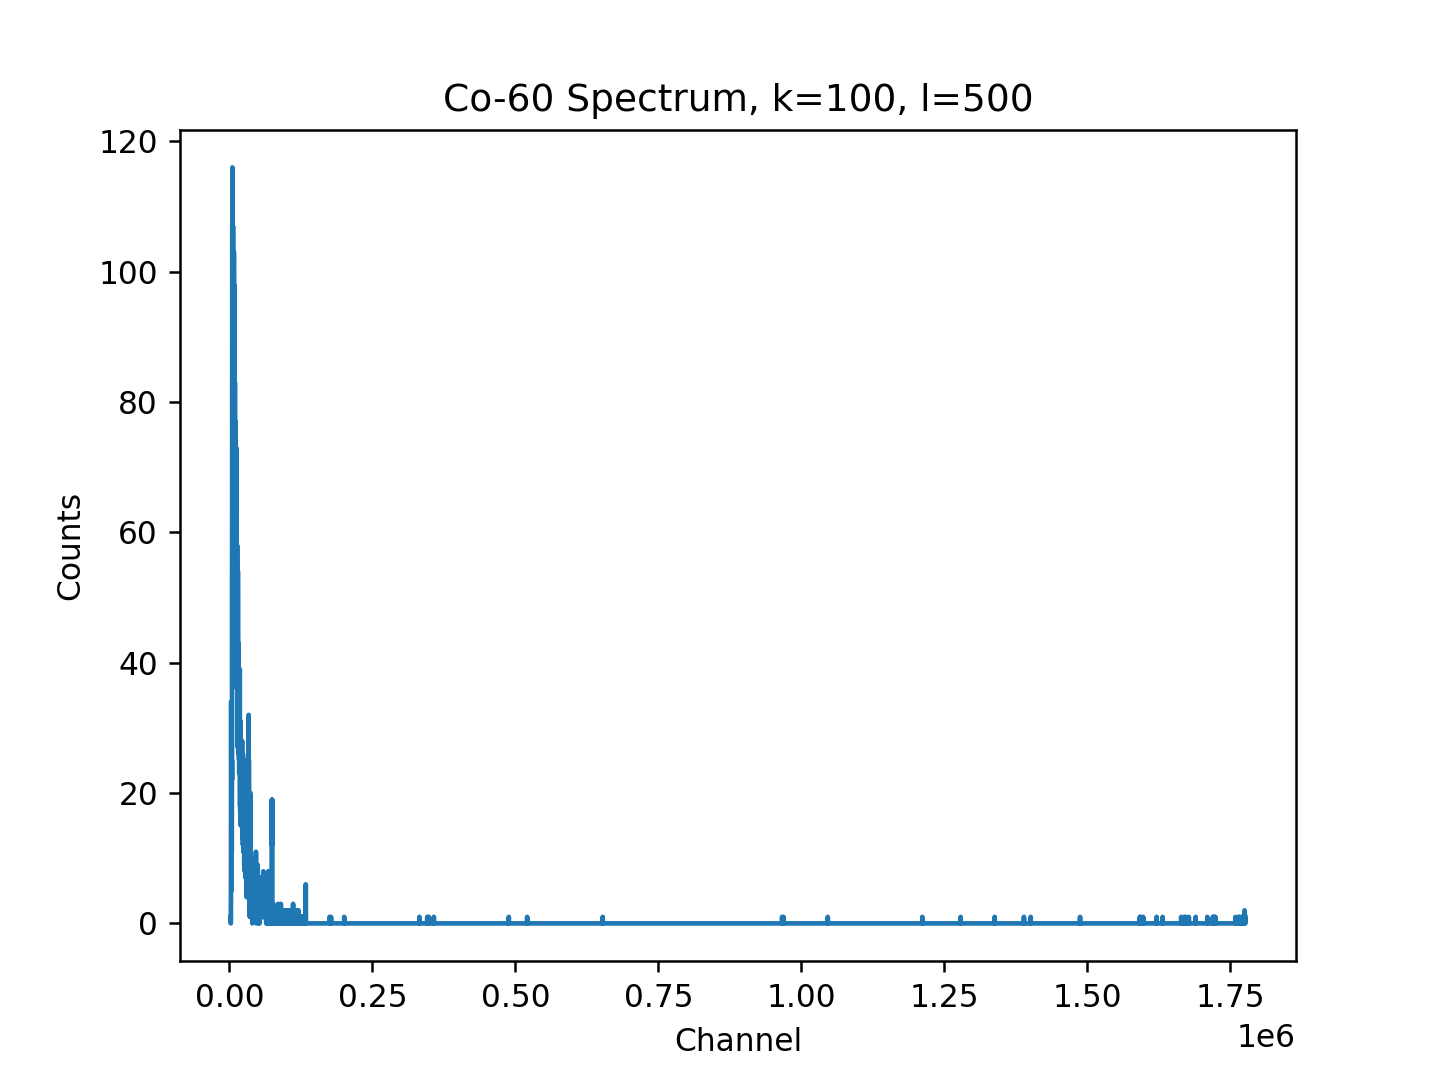

Text(0.5, 1.0, 'Co-60 Spectrum, k=100, l=500')

In [11]:
plt.figure("Filter Corrected Spectrum")
# x=plt.hist(corrected_spectrum/np.max(corrected_spectrum),bins=5000,histtype='step')
x=np.histogram(corrected_spectrum,bins=20000)
# plt.yscale('log')
hist_values=x[0]
hist_bins=x[1]
hist_bins=0.5*(hist_bins[1:]+hist_bins[:-1])
plt.plot(hist_bins,hist_values)
histogram=np.vstack((hist_values,hist_bins))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Co-60 Spectrum, k=100, l=500")
# plt.yscale('log')



In [12]:
rad_source='Am-241'
file_name=rad_source+'_spectrum.npy'
np.save(file_name,corrected_spectrum)